In [1]:
import pandas as pd
import os

df=pd.read_csv(os.path.join(path, "Iris.csv"))
df = df.dropna()
df_filled=df.copy()
for co in df_filled.columns[:-1]:
  df_filled[co].fillna(df_filled[co].mean(), inplace=True)

df_ffill=df.fillna(method='ffill')
df_bfill=df.fillna(method='bfill')

NameError: name 'path' is not defined

/tmp/ipython-input-1732192043.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(df_filled[col].mean(), inplace=True)
/tmp/ipython-input-1732192043.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
/tmp/ipython-input-1732192043.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_

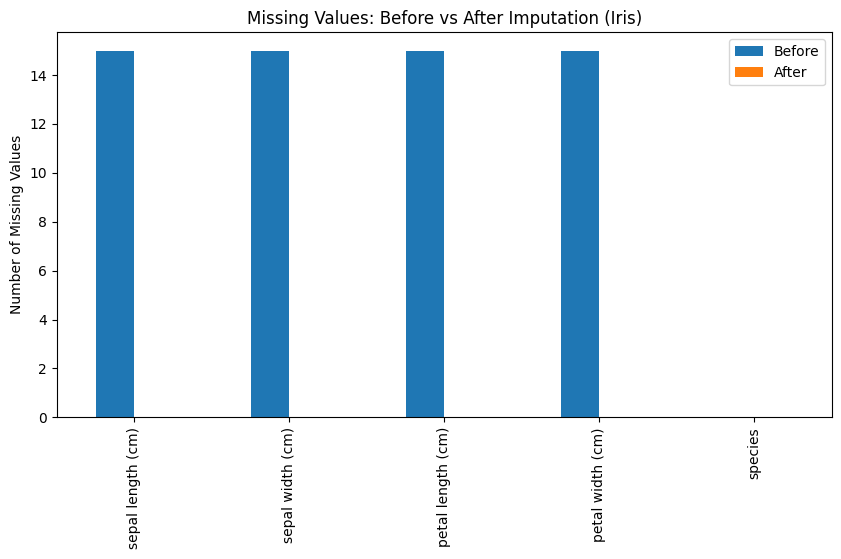

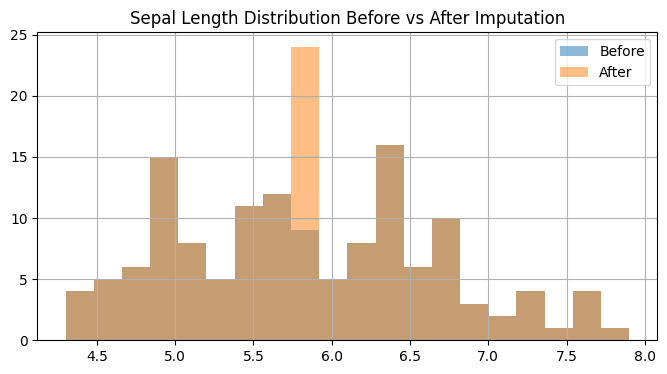

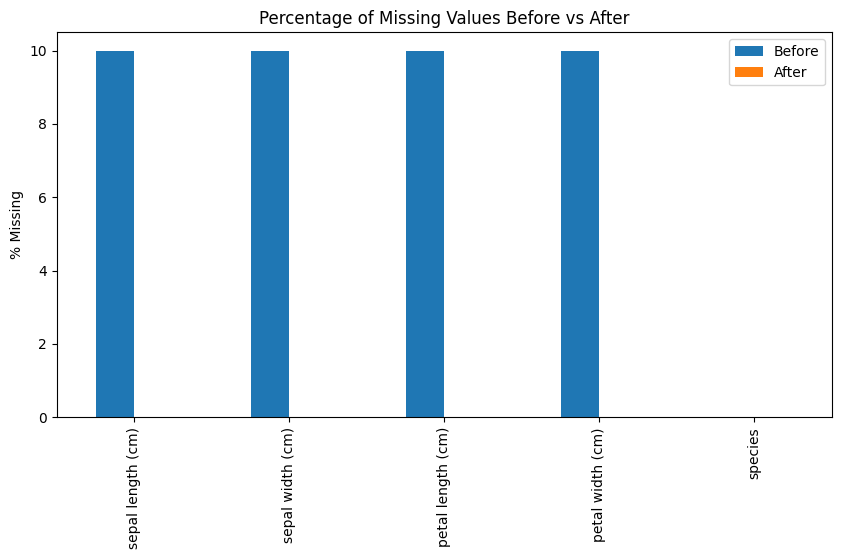

In [ ]:
#Example1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Introduce missing values randomly
np.random.seed(42)
for col in df.columns[:-1]:   # exclude target column
    df.loc[df.sample(frac=0.1).index, col] = np.nan

# Drop rows with any missing value
df_drop_rows = df.dropna()

# Drop columns with any missing value
df_drop_cols = df.dropna(axis=1)

df_filled = df.copy()

for col in df_filled.columns[:-1]:
    df_filled[col].fillna(df_filled[col].mean(), inplace=True)

df_ffill = df.fillna(method='ffill')
df_bfill = df.fillna(method='bfill')

before = df.isna().sum()
after = df_filled.isna().sum()

comparison = pd.DataFrame({
    'Before': before,
    'After': after
})

comparison.plot(kind='bar', figsize=(10,5))
plt.ylabel('Number of Missing Values')
plt.title('Missing Values: Before vs After Imputation (Iris)')
plt.show()

plt.figure(figsize=(8,4))
df['sepal length (cm)'].hist(alpha=0.5, bins=20, label='Before')
df_filled['sepal length (cm)'].hist(alpha=0.5, bins=20, label='After')
plt.legend()
plt.title('Sepal Length Distribution Before vs After Imputation')
plt.show()

missing_perc = pd.DataFrame({
    'Before': df.isna().mean() * 100,
    'After': df_filled.isna().mean() * 100
})

missing_perc.plot(kind='bar', figsize=(10,5))
plt.ylabel('% Missing')
plt.title('Percentage of Missing Values Before vs After')
plt.show()

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
Shape of X: (150, 4)
Entropy Accuracy: 1.0


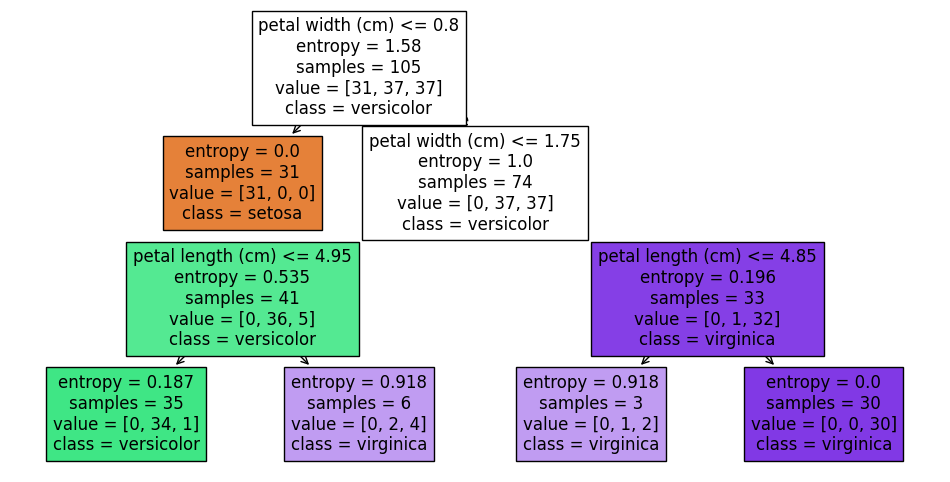

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
iris = load_iris()
X = iris.data
y = iris.target
print("Feature names:", iris.feature_names)
print("Target classes:", iris.target_names)
print("Shape of X:", X.shape)
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

dt_entropy =DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
print("Entropy Accuracy:",accuracy_score(y_test, y_pred_entropy))
plt.figure(figsize=(12,6))
plot_tree(dt_entropy,feature_names=iris.feature_names,class_names=iris.target_names,filled=True)
plt.show()

Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


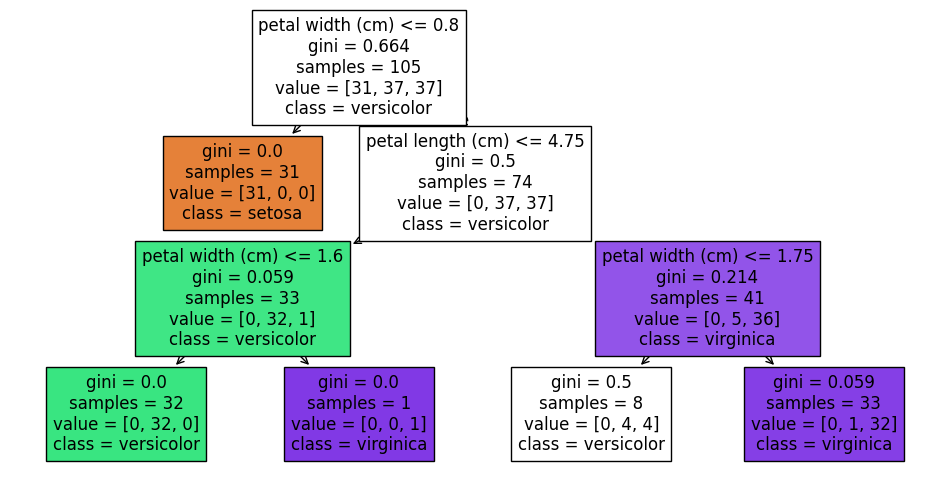

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
dt_gini.fit(X_train, y_train)
y_pred = dt_gini.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
plt.figure(figsize=(12,6))
plot_tree(dt_gini, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

Depth=1, Train Acc=0.65, Test Acc=0.71


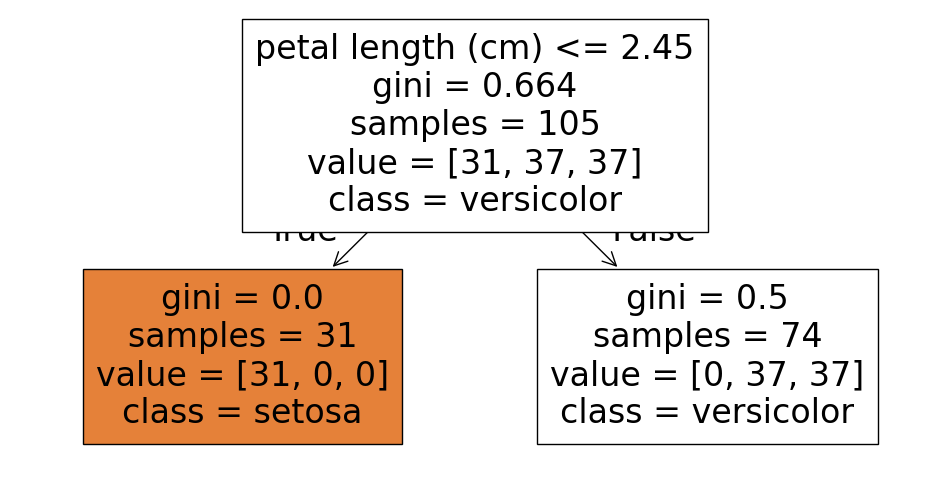

Depth=3, Train Acc=0.95, Test Acc=1.00


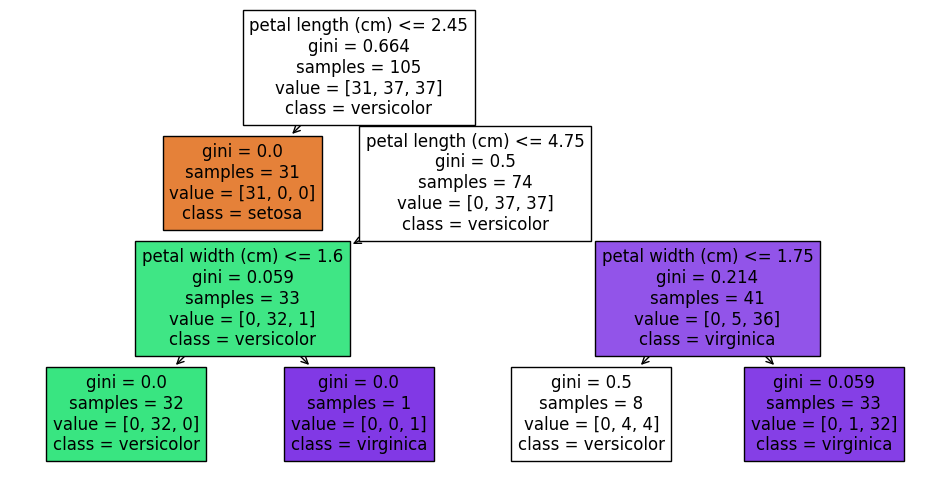

Depth=5, Train Acc=0.99, Test Acc=1.00


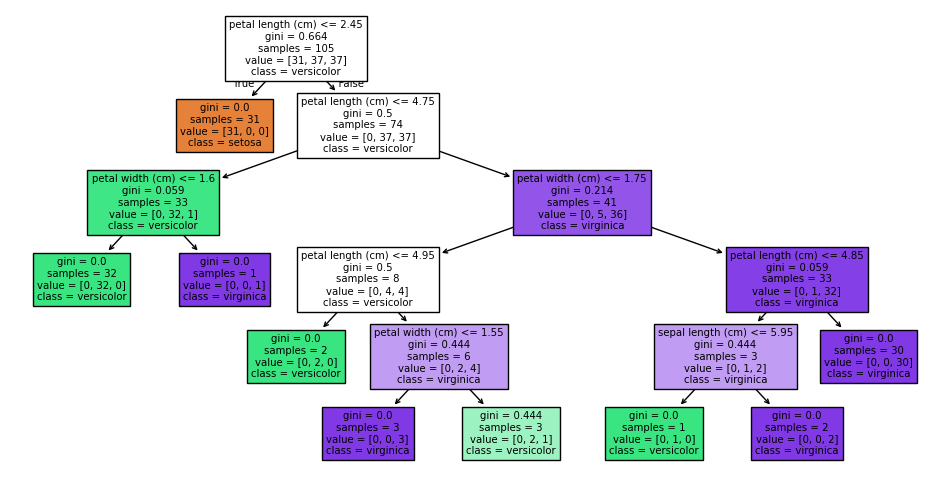

Depth=None, Train Acc=1.00, Test Acc=1.00


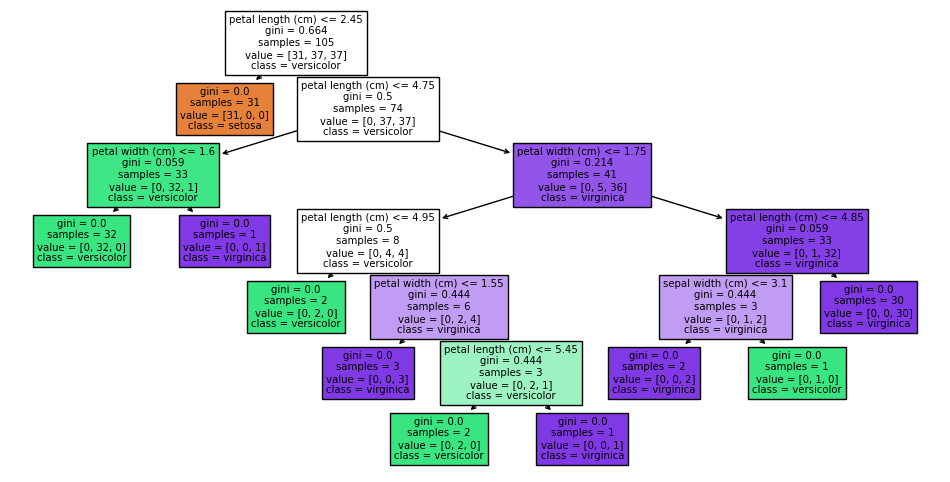

In [ ]:
depths = [1, 3, 5, None]
for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    print(f"Depth={d}, Train Acc={train_acc:.2f}, Test Acc={test_acc:.2f}")
    plt.figure(figsize=(12,6))
    plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
    plt.show()

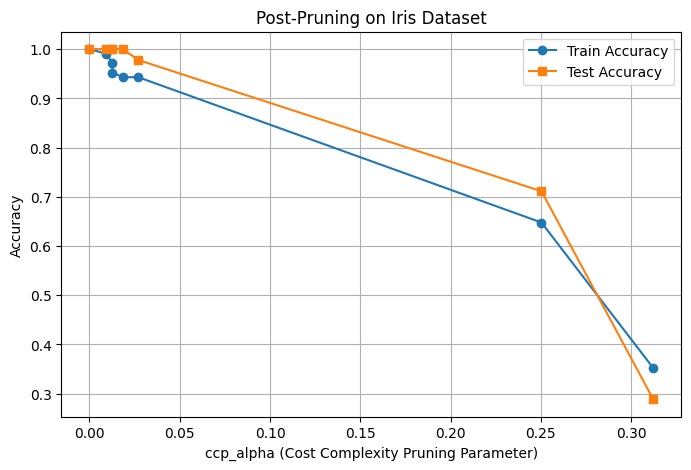

Best ccp_alpha: 0.0
Test Accuracy (pruned tree): 1.0


In [ ]:
dt_pruning = DecisionTreeClassifier(random_state=42)
path_pruning = dt_pruning.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path_pruning.ccp_alphas
impurities = path_pruning.impurities

train_acc = []
test_acc = []

for alpha in ccp_alphas:
    clf_alpha = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf_alpha.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_tra-+in, clf_alpha.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf_alpha.predict(X_test)))

plt.figure(figsize=(8,5))
plt.plot(ccp_alphas, train_acc, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_acc, marker='s', label='Test Accuracy')
plt.xlabel('ccp_alpha (Cost Complexity Pruning Parameter)')
plt.ylabel('Accuracy')
plt.title('Post-Pruning on Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

best_alpha = ccp_alphas[test_acc.index(max(test_acc))]
clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
clf_pruned.fit(X_train, y_train)
print(f"Best ccp_alpha: {best_alpha}")
print(f"Test Accuracy (pruned tree): {accuracy_score(y_test, clf_pruned.predict(X_test))}")

Using Colab cache for faster access to the 'test-file' dataset.
Path to dataset files: /kaggle/input/test-file


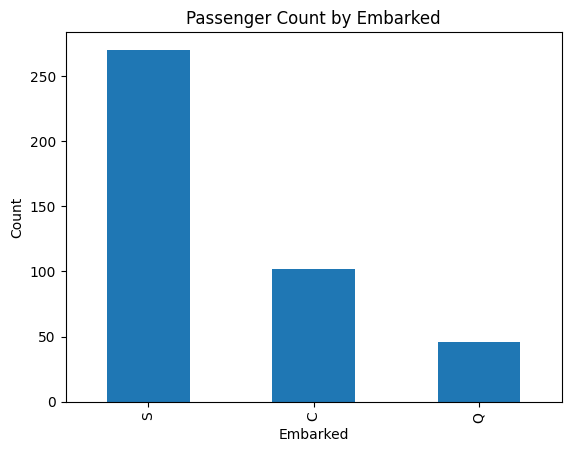

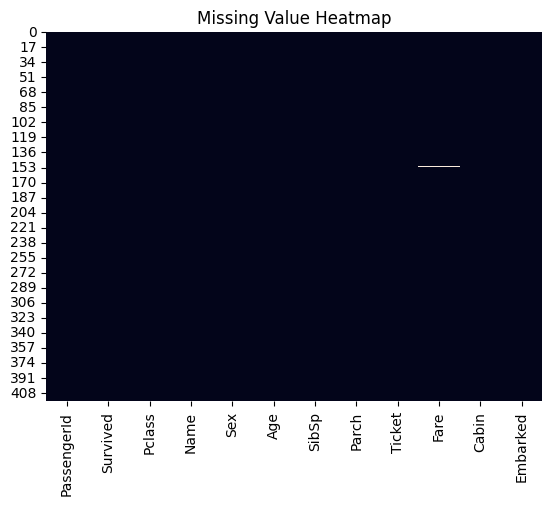

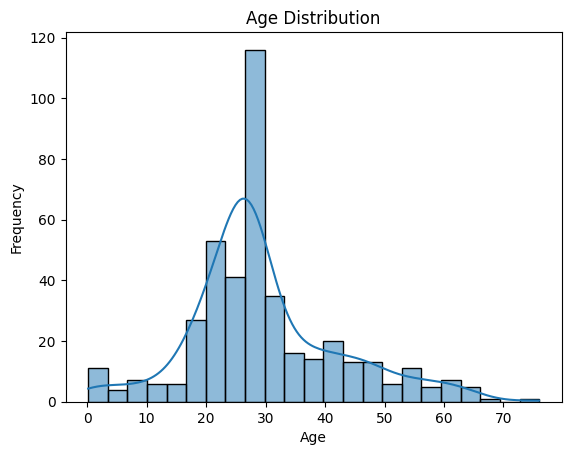

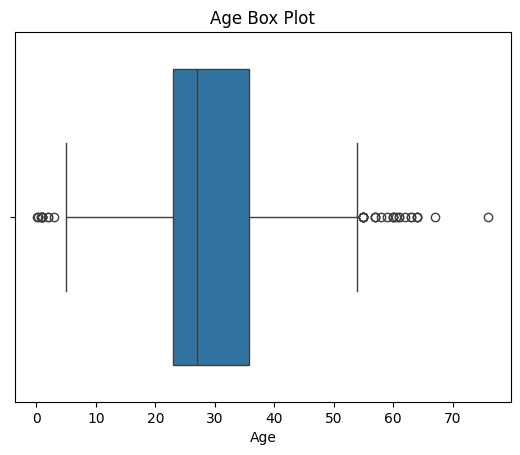

In [6]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

path=kagglehub.dataset_download("brendan45774/test-file")
print("Path to dataset files:",path)
df=pd.read_csv(os.path.join(path,"tested.csv"))
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Cabin"]=df["Cabin"].fillna("Unknown")
df=df.dropna(subset=["Embarked"])
plt.figure()
df["Embarked"].value_counts().plot(kind="bar")
plt.title("Passenger Count by Embarked")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.show()
plt.figure()
sns.heatmap(df.isnull(),cbar=False)
plt.title("Missing Value Heatmap")
plt.show()
plt.figure()
sns.histplot(df["Age"],kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()
plt.figure()
sns.boxplot(x=df["Age"])
plt.title("Age Box Plot")
plt.show()


Depth= 1 Train Acc= 1.0 Test Acc= 1.0
Depth= 3 Train Acc= 1.0 Test Acc= 1.0
Depth= 5 Train Acc= 1.0 Test Acc= 1.0
Depth= 7 Train Acc= 1.0 Test Acc= 1.0
Depth= 9 Train Acc= 1.0 Test Acc= 1.0
Depth= None Train Acc= 1.0 Test Acc= 1.0


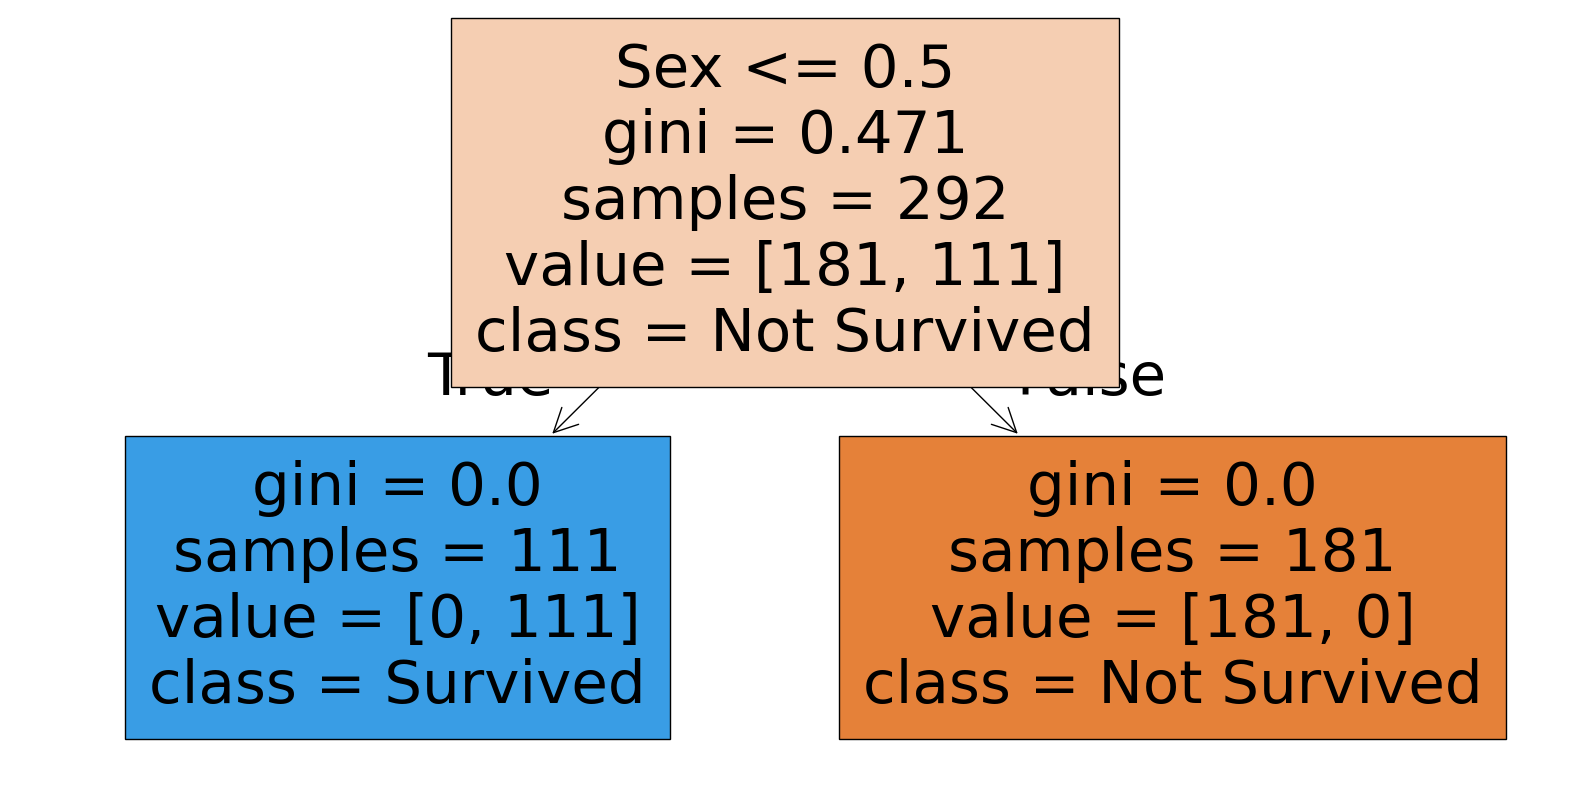

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

path="/kaggle/input/test-file"
df=pd.read_csv(os.path.join(path,"tested.csv"))
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Cabin"]=df["Cabin"].fillna("Unknown")
df=df.dropna(subset=["Embarked"])

df=df.drop(["Name","Ticket"],axis=1,errors="ignore")

le=LabelEncoder()
for col in ["Sex","Embarked","Cabin"]:
    df[col]=le.fit_transform(df[col])

X=df.drop("Survived",axis=1)
y=df["Survived"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

depths=[1,3,5,7,9,None]

for d in depths:
    model=DecisionTreeClassifier(criterion="gini",max_depth=d,random_state=42)
    model.fit(X_train,y_train)

    train_acc=model.score(X_train,y_train)
    test_acc=model.score(X_test,y_test)

    print("Depth=",d,"Train Acc=",round(train_acc,2),"Test Acc=",round(test_acc,2))
cart=DecisionTreeClassifier(criterion="gini",max_depth=5,random_state=42)
cart.fit(X_train,y_train)

plt.figure(figsize=(20,10))
plot_tree(cart,feature_names=X.columns,class_names=["Not Survived","Survived"],filled=True)
plt.show()



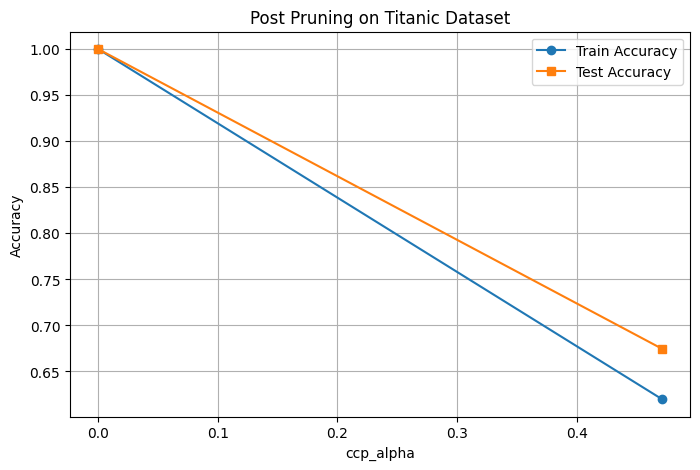

Best ccp_alpha: 0.0
Test Accuracy (Pruned Tree): 1.0


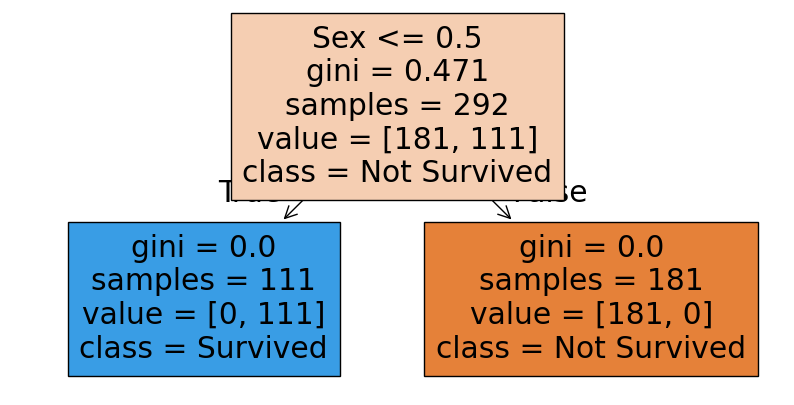

In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

path="/kaggle/input/test-file"
df=pd.read_csv(os.path.join(path,"tested.csv"))
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Cabin"]=df["Cabin"].fillna("Unknown")
df=df.dropna(subset=["Embarked"])
df=df.drop(["Name","Ticket"],axis=1,errors="ignore")
le=LabelEncoder()
for col in ["Sex","Embarked","Cabin"]:
    df[col]=le.fit_transform(df[col])
X=df.drop("Survived",axis=1)
y=df["Survived"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
clf=DecisionTreeClassifier(random_state=42)
path=clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas=path.ccp_alphas

train_acc=[]
test_acc=[]

for alpha in ccp_alphas:
    clf_alpha=DecisionTreeClassifier(random_state=42,ccp_alpha=alpha)
    clf_alpha.fit(X_train,y_train)

    train_acc.append(accuracy_score(y_train,clf_alpha.predict(X_train)))
    test_acc.append(accuracy_score(y_test,clf_alpha.predict(X_test)))

plt.figure(figsize=(8,5))
plt.plot(ccp_alphas,train_acc,marker="o",label="Train Accuracy")
plt.plot(ccp_alphas,test_acc,marker="s",label="Test Accuracy")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Post Pruning on Titanic Dataset")
plt.legend()
plt.grid(True)
plt.show()

best_alpha=ccp_alphas[test_acc.index(max(test_acc))]
print("Best ccp_alpha:",best_alpha)

clf_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=best_alpha)
clf_pruned.fit(X_train,y_train)

print("Test Accuracy (Pruned Tree):",accuracy_score(y_test,clf_pruned.predict(X_test)))
plt.figure(figsize=(10,5))
plot_tree(clf_pruned,feature_names=X.columns,class_names=["Not Survived","Survived"],filled=True)
plt.show()

